In [1]:
import pickle
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
num_components = 20
normalize = True

In [3]:
with open('/home/aleks/hackatum/flavorscape/data/recipes_10k.pkl', 'rb') as file:
    data_pd = pickle.load(file)

min_entries_attribute = 5
min_entries_recipe = 10
    
data_pd = (data_pd.reset_index()
                  .drop_duplicates(subset='index', keep='last')
                  .set_index('index').sort_index())

data_pd = data_pd.drop(data_pd.columns[data_pd.sum(axis=0)<2*min_entries_attribute], axis=1)
data_pd = data_pd.drop(data_pd.index[data_pd.sum(axis=1)<min_entries_recipe], axis=0)
data_pd = data_pd.drop(data_pd.columns[data_pd.sum(axis=0)<min_entries_attribute], axis=1)

data_np = data_pd.to_numpy()
data_mean = data_np.mean(axis=0)
data_std = data_np.std(axis=0)

data_np.shape

(2905, 398)

In [4]:
occurence = data_pd.sum(axis=0).sort_values(ascending=False)
[i for i in list(occurence.index) if 't-' in i]
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(occurence)

salt                                                2850
pepper                                              2798
butter-milk                                         1616
olive-oil                                           1435
c-american                                          1348
cooking-oil                                         1347
sour-cream                                           989
garlic                                               907
scallions                                            820
sugar                                                747
lemon                                                713
vegetable-oil                                        643
lime                                                 642
t-spicy                                              636
chicken-stock-concentrate                            570
c-italian                                            544
yellow-onion                                         533
parmesan-cheese-milk           

In [5]:
if normalize:
    data_np_norm = (data_np - data_mean) / data_std
else:
    data_np_norm = data_np

pca = PCA(n_components=num_components)
dim_reduced_data = pca.fit_transform(data_np_norm)

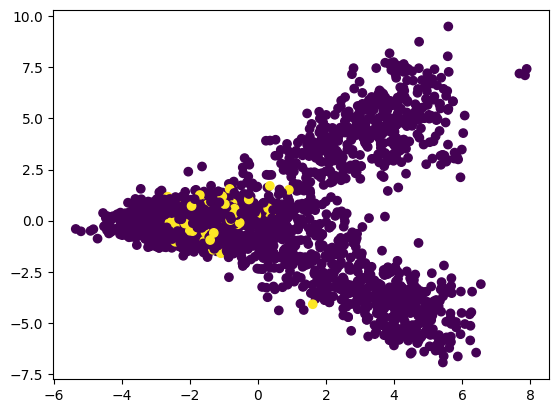

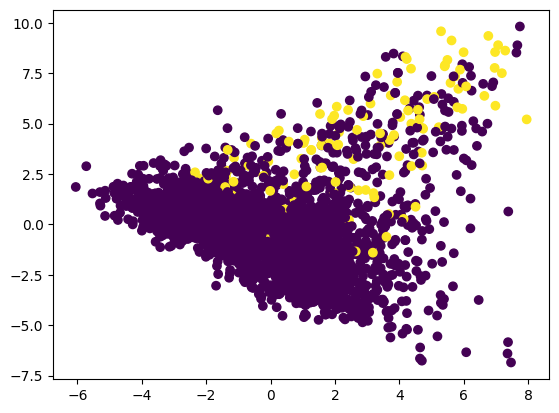

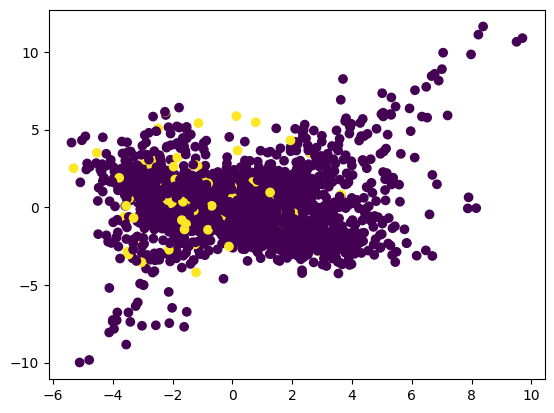

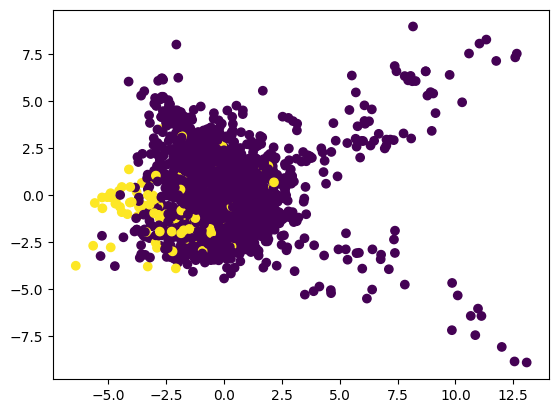

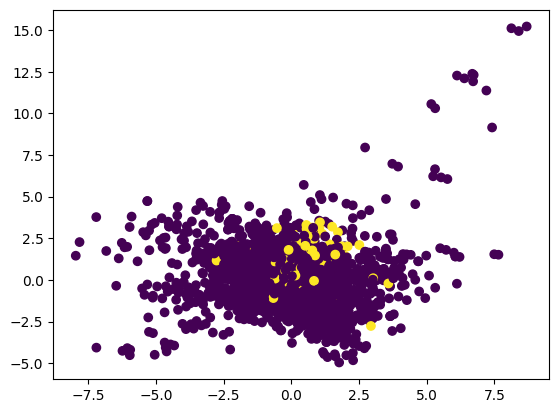

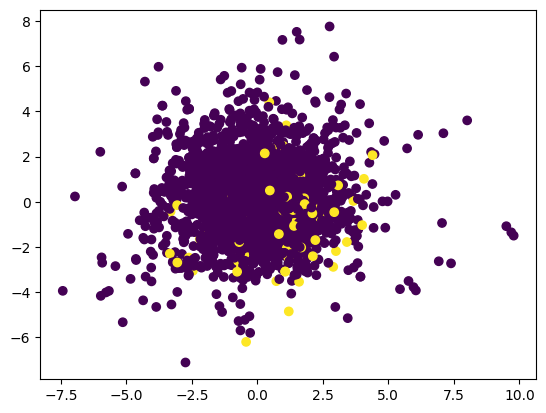

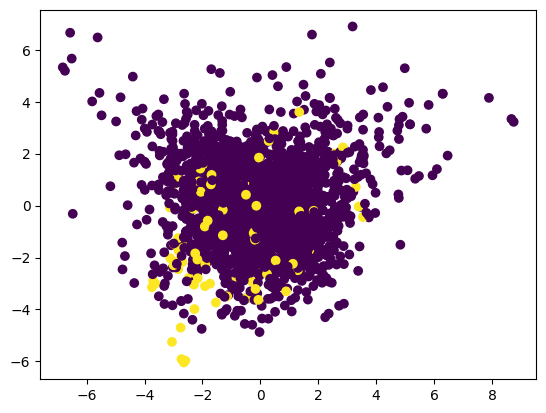

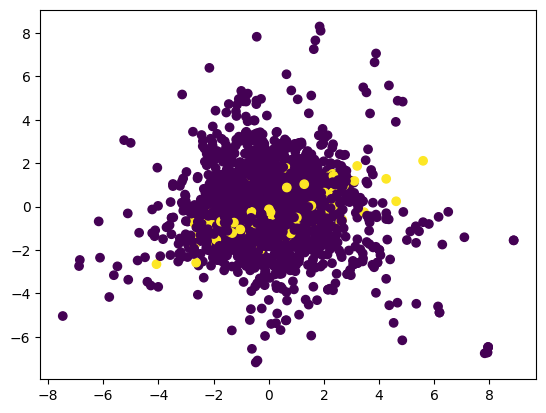

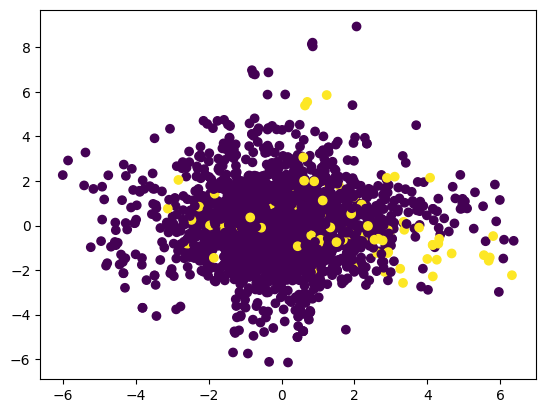

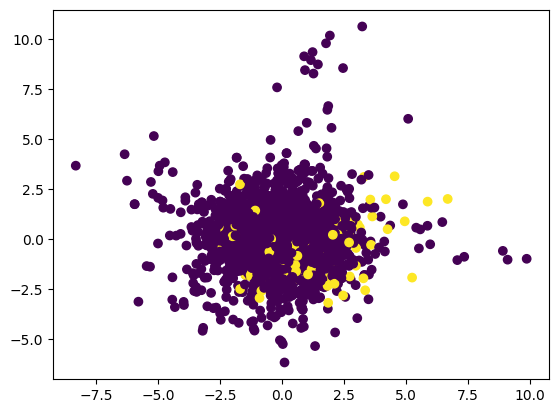

In [6]:
highlight = 'c-mediterranean'

highlight_idx = data_pd.columns.get_loc(highlight)

for i in range(0, min(num_components, 20), 2):
    plt.figure()
    plt.scatter(dim_reduced_data[:,i], dim_reduced_data[:,i+1], c=data_np[:,highlight_idx])

In [7]:
num_recipes = 20
recipe = 'Apple-Pecan Mug Muffins'
print(recipe)

idx = data_pd.index.get_loc(recipe)

diff = (dim_reduced_data - dim_reduced_data[idx])
dist = np.sqrt(np.sum(diff*diff, axis=1))
sorted_idx = dist.argsort()

print(f'\nTop {num_recipes} similar:')
for i in sorted_idx[:num_recipes]:
    print(f'{round(dist[i],2)}: {data_pd.index[i]}')
    
print(f'\nTop {num_recipes} dissimilar:')
for i in sorted_idx[-num_recipes:]:
    print(f'{round(dist[i],2)}: {data_pd.index[i]}')

Apple-Pecan Mug Muffins

Top 20 similar:
0.0: Apple-Pecan Mug Muffins
6.85: Brown Sugar & Bacon Stuffed French Toast
7.56: Cinnamon Apple French Toast Bake
7.82: Apple Cinnamon Breakfast Bake
8.22: Lemon-Ricotta Dutch Baby
8.54: Make-Ahead Overnight Oats Three Ways
8.66: Cinnamon Apple French Toast
9.77: Maple Bacon Pull-Apart Bread
9.81: Bacon-Topped Cinnamon Roll Hotcake Bake
10.42: Peaches & Cream French Toast
10.5: Churro Waffle & Bacon Brunch Board
12.66: Apple Pecan Breakfast Oatmeal Bake
13.44: Spiced Carrot Snack Cake
13.59: Make Ahead Breakfast Harvest Egg Bites
13.66: Baklava-Style French Toast Sticks
14.35: Bacon & Spinach Breakfast Biscuit Bombs
14.41: Almond Streusel Peach Pie
14.42: Pancakes with Cherry-Maple Syrup
14.62: Lemon Ricotta Pancakes with Syrup & Crème
15.18: Chocolate Peanut Butter French Toast

Top 20 dissimilar:
30.9: Spicy Coconut Curry Pork Noodle Soup
31.1: Vegan Curried Roasted Chickpea Bowls
31.34: Shrimp & Mushroom Ravioli
31.62: Vegan Chickpea Coconut

In [9]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(data_pd.iloc[idx].sort_values(ascending=False))

dried-cranberries                                   1
sugar                                               1
t-veggie                                            1
creme-fraiche                                       1
t-quick                                             1
t-calorie-smart                                     1
tempura-mix                                         1
apricot-jam                                         1
t-new                                               1
cinnamon                                            1
red-grapes                                          1
t-breakfast-kits                                    1
c-american                                          1
cream-cheese-milk                                   1
cooking-spray                                       1
pecans-nuts                                         1
apple                                               1
maple-syrup                                         1
salt                        